## Manthan R Shirsat
## Roll no.64   exp-4

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

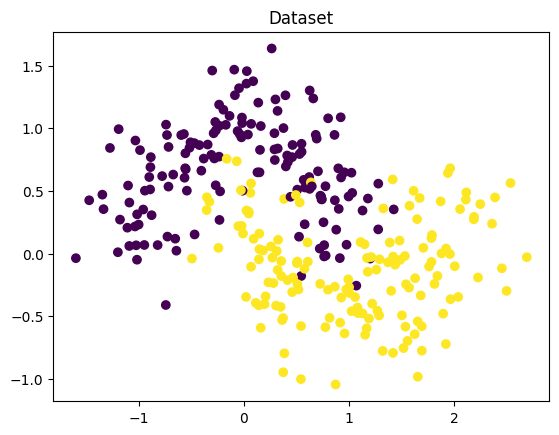

In [6]:
x, y = make_moons(n_samples=300, noise=0.25, random_state=42)
plt.scatter(x[:,0],x[:,1], c=y)
plt.title("Dataset")
plt.show()

In [7]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.3,random_state=0
)

In [9]:
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [12]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)

y_pred_lr =lr.predict(x_test_scaled)
print("logistic Regression")
print("Accuracy:",accuracy_score(y_test,y_pred_lr))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_lr))      

logistic Regression
Accuracy: 0.8777777777777778
confusion matrix:
 [[34  5]
 [ 6 45]]


In [38]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

y_pred_dt =dt.predict(x_test)
print("DecisionTreeClassifier")
print("Accuracy:",accuracy_score(y_test,y_pred_dt))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_dt))      

DecisionTreeClassifier
Accuracy: 0.8888888888888888
confusion matrix:
 [[37  2]
 [ 8 43]]


In [42]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_scaled,y_train)

y_pred_knn =knn.predict(x_test_scaled)
print("KNeighborsClassifier")
print("Accuracy:",accuracy_score(y_test,y_pred_knn))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_knn))   

KNeighborsClassifier
Accuracy: 0.9444444444444444
confusion matrix:
 [[38  1]
 [ 4 47]]


def plot_boundary(model,scaled,title):
    h=0.02
    x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
    y_min,y_max=x[:,0].min()-1,x[:,0].max()+1

    xx,yy= np.meshgrid(np.arange(x_min,x_max,h),
                       np.arange(y_min,y_max,h))
    grid = np.c_[xx.ravel(),yy.ravel()]

    if scaled:
        grid = scaler.transform(grid)
    z=model.predict(grid)
    z=z.reshape(xx.shape)

    plt.contourf(xx,yy,z,alpha=0.3)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.title(title)
    plt.show()

plot_boundary(lr , True ,"Logistic Regression Boundary")
plot_boundary(dt, False,"Decision tree boundary")
plot_boundary(knn, True ,"knn")